# Football match winner prediction

In [2]:
# libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('all_leagues.csv', index_col= 0)
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AC,HY,AY,HR,AR,B365H,B365D,B365A,B365>2.5,B365<2.5
0,SP1,27/08/11,NaN,Granada,Betis,0.0,1.0,A,0.0,0.0,...,5.0,2.0,2.0,0.0,0.0,2.30,3.40,3.00,NaN,NaN
1,SP1,27/08/11,NaN,Sp Gijon,Sociedad,1.0,2.0,A,0.0,1.0,...,2.0,2.0,1.0,1.0,1.0,2.05,3.25,3.75,NaN,NaN
2,SP1,27/08/11,NaN,Valencia,Santander,4.0,3.0,H,1.0,2.0,...,3.0,3.0,3.0,0.0,0.0,1.40,4.33,8.00,NaN,NaN
3,SP1,28/08/11,NaN,Ath Bilbao,Vallecano,1.0,1.0,D,0.0,0.0,...,4.0,1.0,3.0,0.0,0.0,1.57,3.75,6.00,NaN,NaN
4,SP1,28/08/11,NaN,Ath Madrid,Osasuna,0.0,0.0,D,0.0,0.0,...,5.0,1.0,0.0,0.0,0.0,1.53,3.80,6.50,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84788 entries, 0 to 179
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       84668 non-null  object 
 1   Date      84668 non-null  object 
 2   Time      22374 non-null  object 
 3   HomeTeam  84668 non-null  object 
 4   AwayTeam  84668 non-null  object 
 5   FTHG      84666 non-null  float64
 6   FTAG      84666 non-null  float64
 7   FTR       84666 non-null  object 
 8   HTHG      84606 non-null  float64
 9   HTAG      84606 non-null  float64
 10  HTR       84606 non-null  object 
 11  HS        60321 non-null  float64
 12  AS        60321 non-null  float64
 13  HST       60321 non-null  float64
 14  AST       60321 non-null  float64
 15  HF        58977 non-null  float64
 16  AF        58977 non-null  float64
 17  HC        60321 non-null  float64
 18  AC        60321 non-null  float64
 19  HY        63412 non-null  float64
 20  AY        63413 non-null  floa

## some common data attributes
Div = League Division
<br>
Date = Match Date (dd/mm/yy)
<br>
HomeTeam = Home Team
<br>
AwayTeam = Away Team
<br>
FTHG = Full Time Home Team Goals
<br>
FTAG = Full Time Away Team Goals
<br>
FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
<br>
HTHG = Half Time Home Team Goals
<br>
HTAG = Half Time Away Team Goals
<br>
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)
## some common match statistics
HS = Home Team Shots
<br>
AS = Away Team Shots
<br>
HST = Home Team Shots on Target
<br>
AST = Away Team Shots on Target
<br>
HC = Home Team Corners
<br>
AC = Away Team Corners
<br>
HF = Home Team Fouls Committed
<br>
AF = Away Team Fouls Committed
<br>
HY = Home Team Yellow Cards
<br>
AY = Away Team Yellow Cards
<br>
HR = Home Team Red Cards
<br>
AR = Away Team Red Cards

In [6]:
# Removal of few columns which have considerable missing values ('Time','B365>2.5','B365<2.5') 
# or less important ('Date') as per assumptions 

df.drop(['Time', 'Date', 'B365>2.5', 'B365<2.5'], axis=1, inplace=True)
df 

,Div,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
0,SP1,Granada,Betis,0.0,1.0,A,0.0,0.0,D,11.0,...,16.0,8.0,5.0,2.0,2.0,0.0,0.0,2.30,3.40,3.00
1,SP1,Sp Gijon,Sociedad,1.0,2.0,A,0.0,1.0,A,17.0,...,11.0,9.0,2.0,2.0,1.0,1.0,1.0,2.05,3.25,3.75
2,SP1,Valencia,Santander,4.0,3.0,H,1.0,2.0,A,26.0,...,11.0,10.0,3.0,3.0,3.0,0.0,0.0,1.40,4.33,8.00
3,SP1,Ath Bilbao,Vallecano,1.0,1.0,D,0.0,0.0,D,10.0,...,19.0,9.0,4.0,1.0,3.0,0.0,0.0,1.57,3.75,6.00
4,SP1,Ath Madrid,Osasuna,0.0,0.0,D,0.0,0.0,D,28.0,...,8.0,12.0,5.0,1.0,0.0,0.0,0.0,1.53,3.80,6.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,SC3,Annan Athletic,Kelty Hearts,1.0,2.0,A,1.0,2.0,A,2.0,...,13.0,4.0,3.0,1.0,1.0,0.0,0.0,3.30,3.60,1.85
176,SC3,Cowdenbeath,Albion Rvs,0.0,1.0,A,0.0,0.0,D,2.0,...,5.0,7.0,3.0,3.0,1.0,0.0,0.0,NaN,NaN,NaN
177,SC3,Forfar,Stenhousemuir,0.0,0.0,D,0.0,0.0,D,16.0,...,12.0,7.0,3.0,0.0,1.0,0.0,0.0,1.90,3.25,3.50
178,SC3,Stirling,Edinburgh City,5.0,0.0,H,4.0,0.0,H,12.0,...,3.0,3.0,2.0,0.0,1.0,0.0,0.0,2.60,3.10,2.70


In [7]:
# changing object classes into category class
for col in ['Div', 'HomeTeam', 'HTR', 'AwayTeam', 'FTR']:
    df[col] = df[col].astype('category')

In [8]:
# Removal of rows with null values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58864 entries, 0 to 179
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Div       58864 non-null  category
 1   HomeTeam  58864 non-null  category
 2   AwayTeam  58864 non-null  category
 3   FTHG      58864 non-null  float64 
 4   FTAG      58864 non-null  float64 
 5   FTR       58864 non-null  category
 6   HTHG      58864 non-null  float64 
 7   HTAG      58864 non-null  float64 
 8   HTR       58864 non-null  category
 9   HS        58864 non-null  float64 
 10  AS        58864 non-null  float64 
 11  HST       58864 non-null  float64 
 12  AST       58864 non-null  float64 
 13  HF        58864 non-null  float64 
 14  AF        58864 non-null  float64 
 15  HC        58864 non-null  float64 
 16  AC        58864 non-null  float64 
 17  HY        58864 non-null  float64 
 18  AY        58864 non-null  float64 
 19  HR        58864 non-null  float64 
 20  AR      

In [10]:
df.columns

Index(['Div', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'B365H', 'B365D', 'B365A'],
      dtype='object')

In [11]:
# Teams played in their home ground
Home_teams = df['HomeTeam'].unique()
Home_teams


['Granada', 'Sp Gijon', 'Valencia', 'Ath Bilbao', 'Ath Madrid', ..., 'Edinburgh City', 'Elgin', 'Cowdenbeath', 'Stirling', 'Kelty Hearts']
Length: 500
Categories (580, object): ['AEK', 'AFC Telford United', 'AFC Wimbledon', 'AZ Alkmaar', ..., 'Yeovil', 'York', 'Zaragoza', 'Zwolle']

In [12]:
# Total number of home game played by each team
Home_game = []
for i in Home_teams:
    Home_game.append(df[(df['HomeTeam']== i) ]['HomeTeam'] .count())
         

500

In [13]:
# calculation of home win, draw, and loss for all the teams
Home_wins = []
Home_draw = []
Home_loss = []
for i in Home_teams:
    Home_wins.append(df[(df['HomeTeam']== i) & (df['FTR']== 'H') ]['HomeTeam'] .count())
    Home_draw.append(df[(df['HomeTeam']== i) & (df['FTR']== 'D') ]['HomeTeam'] .count())
    Home_loss.append(df[(df['HomeTeam']== i) & (df['FTR']== 'A') ]['HomeTeam'] .count())    

In [14]:
# calculation of home win, draw, and loss probability for all the teams
Home_wins_prob = []
Home_draw_prob = []
Home_loss_prob = []
for i in range(0,len(Home_game)):
    Home_wins_prob.append(Home_wins[i]/Home_game[i])
    Home_draw_prob.append(Home_draw[i]/Home_game[i])
    Home_loss_prob.append(Home_loss[i]/Home_game[i])
    

In [15]:
# putting home probability as per FTR
Home_prob = []
for i in range(0,len(df['HomeTeam'])):
    for j in range(0, len(Home_teams)):
        if df['HomeTeam'].iloc[i] == Home_teams[j]:
            if df['FTR'].iloc[i]=='H':
                Home_prob.append(Home_wins_prob[j])
            elif df['FTR'].iloc[i]=='A':
                Home_prob.append(Home_loss_prob[j])
            else:
                Home_prob.append(Home_draw_prob[j])                
        

In [16]:
len(Home_prob)

58864

In [17]:
# adding a column "HP" which has the home probability as per FTR 
df['HP'] = Home_prob
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58864 entries, 0 to 179
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Div       58864 non-null  category
 1   HomeTeam  58864 non-null  category
 2   AwayTeam  58864 non-null  category
 3   FTHG      58864 non-null  float64 
 4   FTAG      58864 non-null  float64 
 5   FTR       58864 non-null  category
 6   HTHG      58864 non-null  float64 
 7   HTAG      58864 non-null  float64 
 8   HTR       58864 non-null  category
 9   HS        58864 non-null  float64 
 10  AS        58864 non-null  float64 
 11  HST       58864 non-null  float64 
 12  AST       58864 non-null  float64 
 13  HF        58864 non-null  float64 
 14  AF        58864 non-null  float64 
 15  HC        58864 non-null  float64 
 16  AC        58864 non-null  float64 
 17  HY        58864 non-null  float64 
 18  AY        58864 non-null  float64 
 19  HR        58864 non-null  float64 
 20  AR      

C:\Users\MAS LAB-4\AppData\Local\Temp\ipykernel_6548\3194923282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HP'] = Home_prob


### Away probability as per FTR
same as the above steps

In [19]:
Away_teams = df['AwayTeam'].unique()
Away_teams

['Betis', 'Sociedad', 'Santander', 'Vallecano', 'Osasuna', ..., 'Annan Athletic', 'Edinburgh City', 'Elgin', 'Berwick', 'Kelty Hearts']
Length: 501
Categories (580, object): ['AEK', 'AFC Telford United', 'AFC Wimbledon', 'AZ Alkmaar', ..., 'Yeovil', 'York', 'Zaragoza', 'Zwolle']

In [20]:
# group the data on team value.
Away_game = []
for i in Away_teams:
    Away_game.append(df[(df['AwayTeam']== i) ]['AwayTeam'] .count())
len(Away_game) 

501

In [22]:
Away_wins = []
Away_draw = []
Away_loss = []
for i in Away_teams:
    Away_wins.append(df[(df['AwayTeam']== i) & (df['FTR']== 'H') ]['AwayTeam'] .count())
    Away_draw.append(df[(df['AwayTeam']== i) & (df['FTR']== 'D') ]['AwayTeam'] .count())
    Away_loss.append(df[(df['AwayTeam']== i) & (df['FTR']== 'A') ]['AwayTeam'] .count())  

In [23]:
Away_wins_prob = []
Away_draw_prob = []
Away_loss_prob = []
for i in range(0,len(Away_game)):
    Away_wins_prob.append(Away_wins[i]/Away_game[i])
    Away_draw_prob.append(Away_draw[i]/Away_game[i])
    Away_loss_prob.append(Away_loss[i]/Away_game[i])

In [25]:
Away_prob = []
for i in range(0,len(df['AwayTeam'])):
    for j in range(0, len(Away_teams)):
        if df['AwayTeam'].iloc[i] == Away_teams[j]:
            if df['FTR'].iloc[i]=='H':
                Away_prob.append(Away_wins_prob[j])
            elif df['FTR'].iloc[i]=='A':
                Away_prob.append(Away_loss_prob[j])
            else:
                Away_prob.append(Away_draw_prob[j]) 

In [27]:
len(Away_prob)

58864

In [28]:
df['AP'] = Away_prob
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58864 entries, 0 to 179
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Div       58864 non-null  category
 1   HomeTeam  58864 non-null  category
 2   AwayTeam  58864 non-null  category
 3   FTHG      58864 non-null  float64 
 4   FTAG      58864 non-null  float64 
 5   FTR       58864 non-null  category
 6   HTHG      58864 non-null  float64 
 7   HTAG      58864 non-null  float64 
 8   HTR       58864 non-null  category
 9   HS        58864 non-null  float64 
 10  AS        58864 non-null  float64 
 11  HST       58864 non-null  float64 
 12  AST       58864 non-null  float64 
 13  HF        58864 non-null  float64 
 14  AF        58864 non-null  float64 
 15  HC        58864 non-null  float64 
 16  AC        58864 non-null  float64 
 17  HY        58864 non-null  float64 
 18  AY        58864 non-null  float64 
 19  HR        58864 non-null  float64 
 20  AR      

C:\Users\MAS LAB-4\AppData\Local\Temp\ipykernel_6548\2811629599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AP'] = Away_prob


In [30]:
# conversion of categorical values of 'HTR' and 'FTR' to numerical values 
result_dict = {'D' : 0,
               'H' : 1,
               'A' : 2}
df['HTR'] = df['HTR'].map(result_dict)
df['FTR'] = df['FTR'].map(result_dict)

C:\Users\MAS LAB-4\AppData\Local\Temp\ipykernel_6548\1109808872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HTR'] = df['HTR'].map(result_dict)
C:\Users\MAS LAB-4\AppData\Local\Temp\ipykernel_6548\1109808872.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FTR'] = df['FTR'].map(result_dict)


#### Giving each team a unique number and replace 'HomeTeam' and 'AwayTeam' names with that number

In [31]:

Teams = []
for i in df['HomeTeam'].unique():
    Teams.append(i)
for i in df['AwayTeam'].unique():
    Teams.append(i)
all_teams = np.unique(np.array(Teams))    
len(all_teams) 

501

In [32]:
count = 0
d = {}  # Empty dictionary to add values into
for i in all_teams:
    d[i] = count
    count += 1
print(d)

{'AEK': 0, 'AFC Telford United': 1, 'AFC Wimbledon': 2, 'AZ Alkmaar': 3, 'Aberdeen': 4, 'Accrington': 5, 'Ad. Demirspor': 6, 'Airdrie Utd': 7, 'Ajaccio': 8, 'Ajaccio GFCO': 9, 'Ajax': 10, 'Akhisar Belediyespor': 11, 'Alanyaspor': 12, 'Alaves': 13, 'Albacete': 14, 'Albion Rvs': 15, 'Alcorcon': 16, 'Aldershot': 17, 'Alessandria': 18, 'Alfreton Town': 19, 'Alloa': 20, 'Almeria': 21, 'Altay': 22, 'Altrincham': 23, 'Amiens': 24, 'Amorebieta': 25, 'Anderlecht': 26, 'Angers': 27, 'Ankaragucu': 28, 'Annan Athletic': 29, 'Antalyaspor': 30, 'Antwerp': 31, 'Apollon': 32, 'Apollon Apollon': 33, 'Arbroath': 34, 'Aris': 35, 'Arouca': 36, 'Arsenal': 37, 'Ascoli': 38, 'Asteras Tripolis': 39, 'Aston Villa': 40, 'Atalanta': 41, 'Ath Bilbao': 42, 'Ath Madrid': 43, 'Atromitos': 44, 'Augsburg': 45, 'Auxerre': 46, 'Avellino': 47, 'Aves': 48, 'Ayr': 49, 'Barcelona': 50, 'Barcelona B': 51, 'Bari': 52, 'Barnet': 53, 'Barnsley': 54, 'Barrow': 55, 'Bastia': 56, 'Bath City': 57, 'Bayern Munich': 58, 'Beerschot VA

In [33]:
df['HomeTeam'] = df['HomeTeam'].map(d)
df['AwayTeam'] = df['AwayTeam'].map(d)
df.head()

C:\Users\MAS LAB-4\AppData\Local\Temp\ipykernel_6548\3238242631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HomeTeam'] = df['HomeTeam'].map(d)
C:\Users\MAS LAB-4\AppData\Local\Temp\ipykernel_6548\3238242631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AwayTeam'] = df['AwayTeam'].map(d)


,Div,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AC,HY,AY,HR,AR,B365H,B365D,B365A,HP,AP
0,SP1,209.0,65.0,0.0,1.0,2,0.0,0.0,0,11.0,...,5.0,2.0,2.0,0.0,0.0,2.30,3.40,3.00,0.339623,0.284211
1,SP1,423.0,417.0,1.0,2.0,2,0.0,1.0,2,17.0,...,2.0,2.0,1.0,1.0,1.0,2.05,3.25,3.75,0.327044,0.311005
2,SP1,465.0,403.0,4.0,3.0,1,1.0,2.0,2,26.0,...,3.0,3.0,3.0,0.0,0.0,1.40,4.33,8.00,0.516746,0.500000
3,SP1,42.0,468.0,1.0,1.0,0,0.0,0.0,0,10.0,...,4.0,1.0,3.0,0.0,0.0,1.57,3.75,6.00,0.277512,0.255102
4,SP1,43.0,337.0,0.0,0.0,0,0.0,0.0,0,28.0,...,5.0,1.0,0.0,0.0,0.0,1.53,3.80,6.50,0.200957,0.285714


In [35]:
# df.to_csv('football_data.csv')

In [19]:
# df = pd.read_csv('football_data.csv',index_col=0)
# df.head()

# Data Exploration

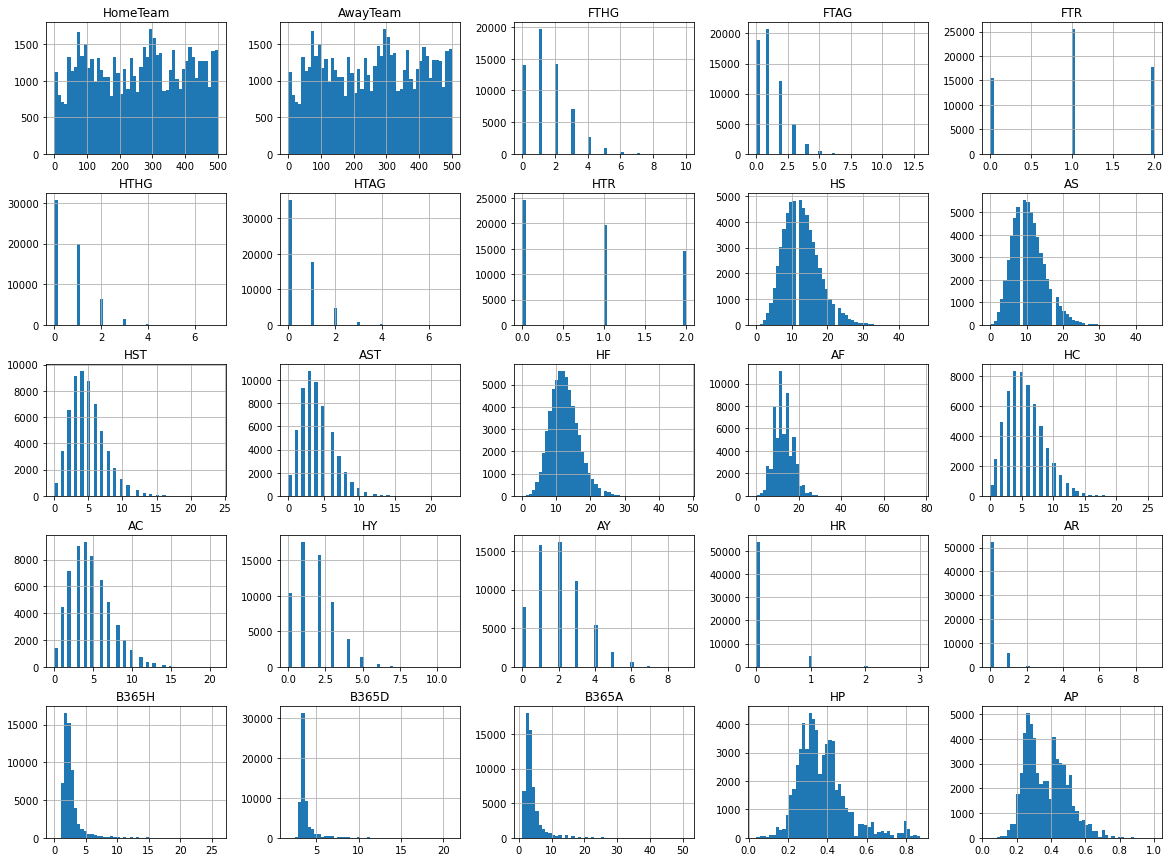

In [7]:
# only plots the numerical data types but not the object type
%matplotlib inline 
df.hist(bins=50, figsize=(20,15))
plt.show()

C:\Users\MAS LAB-4\AppData\Local\Temp\ipykernel_5192\2656190486.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot:>

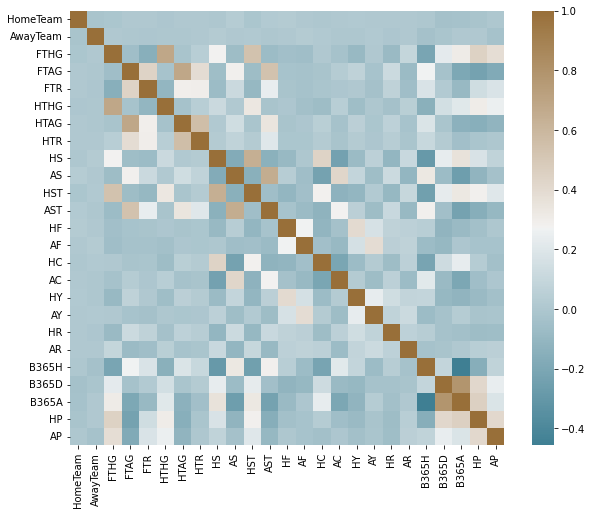

In [10]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax)

### ML Architecture

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Div']= label_encoder.fit_transform(df['Div'])
X = df.drop(['FTR'], axis=1)
y = df["FTR"].astype('category')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
# machine learing model pipeline

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [12]:
model_pipeline = []

model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(GaussianNB())

In [13]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
 
model_list = [  'SVM', 'KNN',  'Naive Bayes']
acc_list = []
auc_list = []
cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #fpr, tpr, _thresolds = metrics.roc_curve(y_test, y_pred)
    #auc_list.append(round(metrics.auc(fpr, tpr),2))
    cm_list.append(confusion_matrix(y_test, y_pred))

In [14]:
result_df = pd.DataFrame({'Model' : model_list, 'Accuracy': acc_list}) 
result_df

,Model,Accuracy
0,SVM,0.620498
1,KNN,0.456059
2,Naive Bayes,0.836920


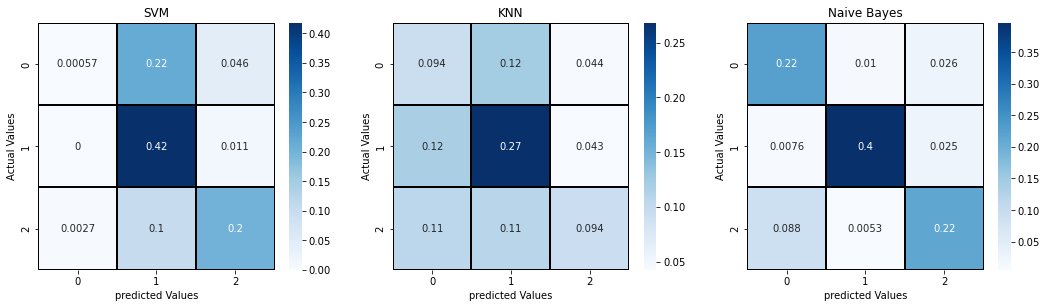

In [18]:
# plot  confusion matrix

fig = plt.figure(figsize= (18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    #cm_plot = plt.imshow( cm , cmap = 'cool' , interpolation = 'nearest')
    cm_plot =  sns.heatmap(cm/np.sum(cm), annot=True, cmap = 'Blues', linewidths = 0.1, linecolor='black')
    cm_plot.set_xlabel('predicted Values')
    cm_plot.set_ylabel('Actual Values')

### Hyperparameter Tuning to improve Accuracy

In [41]:
# https://www.analyticsvidhya.com/blog/2021/01/gaussian-naive-bayes-with-hyperpameter-tuning/
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [43]:
gs_NB.best_params_

{'var_smoothing': 0.0002310129700083158}

In [44]:
gs_NB.best_score_

0.8586825217063042

In [45]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

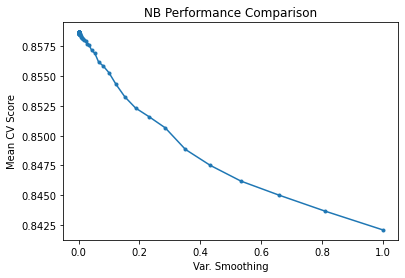

In [46]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [47]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)
from sklearn.metrics import accuracy_score
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.8595696489241224
